In [1]:
# Imports

import pandas as pd
from pandas import DataFrame, Series
from pandas.core.resample import TimeGrouper
from pandas.tseries.offsets import DateOffset
import numpy as np
import json
import sklearn 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

clean_tweets = pd.read_csv('/home/theresa/derby_cleantext.csv') 

In [3]:
clean_tweets.head()

,created_at,CleanText
0,{'$date': '2017-05-06T12:07:53.000Z'},tv today pm et nbc sn nhl nyr ottawa tied pm e...
1,{'$date': '2017-05-06T12:07:58.000Z'},good morning happy rd running kentucky derby p...
2,{'$date': '2017-05-06T12:07:58.000Z'},abrlive definitive story one eyed kentuckyderb...
3,{'$date': '2017-05-06T12:07:58.000Z'},co vnwkzynzcw co trnv yk l
4,{'$date': '2017-05-06T12:07:59.000Z'},bloodhorse happy derby day co kv eospbs


In [4]:
clean_tweets_polarity = pd.read_csv('derby_sentiment_polarity.csv')

In [5]:
clean_tweets_polarity.head()

,CleanText,Sentiment,Sentiment Category
0,tv today pm et nbc sn nhl nyr ottawa tied pm e...,0.000000,Neutral
1,good morning happy rd running kentucky derby p...,0.633333,Positive
2,abrlive definitive story one eyed kentuckyderb...,0.000000,Neutral
3,co vnwkzynzcw co trnv yk l,0.000000,Neutral
4,bloodhorse happy derby day co kv eospbs,0.800000,Positive


In [6]:
def adjustedHours(timestamps): #only takes date/time stamps and returns adjusted hours/minutes
    #In the Derby example, this helps with graphing over time and adjusts for faulty time-zones
    hours_list=[]
    for entry in timestamps:
        hours_list.append(entry[11:18]) #[11:16] gives the hours and minutes
    for i in range(len(hours_list)):
        word = list(hours_list[i])
        word[1] = str( int(word[1]) + 1)
        hours_list[i] = ''.join(word)
    return hours_list
    

In [7]:
datetime_list = []  #useful for graphing
for timestamp in clean_tweets['created_at'] :
    datetime_list.append(timestamp[11:35])


datetimes = pd.to_datetime(pd.Series( datetime_list))

#this helps turn the time-stamps into a format that the tz_localize and tz_convert functions like

In [8]:
clean_tweets_polarity['datetime'] = datetimes

In [9]:
clean_tweets_polarity.set_index('datetime', drop=False, inplace=True)

In [10]:
clean_tweets_polarity.index= clean_tweets_polarity.index.tz_localize('UTC').tz_convert('EST')
#The 000Z at the end of clean_tweets time-stamps mean UTC, while the Derby happened in EST
#Somehow, the hours are managing to be in central time, however.

In [11]:
def adjustedHours(timestamps): #only takes date/time stamps and returns adjusted hours/minutes
    #In the Derby example, this helps with graphing over time and adjusts for faulty time-zones
    hours_list=[]
    for entry in timestamps:
        entry = str(entry)
        hours_list.append(entry[11:16]) 
    for i in range(len(hours_list)):
        word = list(hours_list[i])
        word[1] = str( int(word[1]) + 1)
        hours_list[i] = ''.join(word)
    return hours_list
    

In [12]:
derby1m = clean_tweets_polarity['datetime'].resample('1t').count()
derby1m.index = derby1m.index.tz_convert('EST')

In [13]:
hoursminutes = adjustedHours(list(derby1m.index))
derby1m.index = hoursminutes
#prepares the indices for use graphing

In [14]:
avg = derby1m.mean()
print (avg) 


152.90225563909775


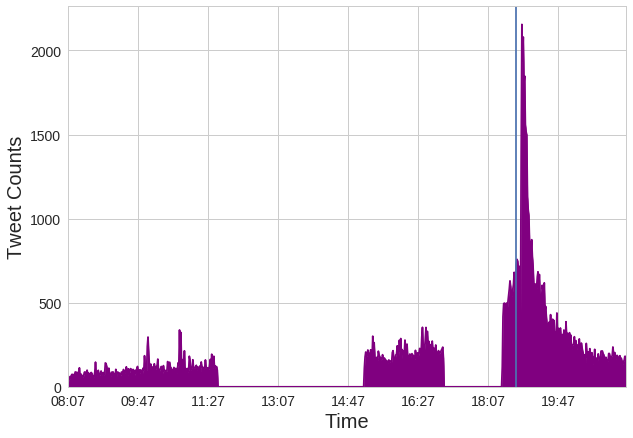

In [15]:
fig, ax = plt.subplots()

derby1m.plot(legend=False,figsize=(10,7), kind = 'area', color = 'purple')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Time',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Counts',fontsize=20,family='sans-serif')



plt.axvline(x=639, ymin=0, ymax=2000, hold=None) #this is the scheduled race time

In [16]:
derby1m.argmax() #due to the times being off, this means that the rate of tweeting was highest at 6:55pm

'18:55'

In [17]:
derby1m.max()

2155

In [18]:
sentiment5m = clean_tweets_polarity['Sentiment'].resample('5t').mean()

In [19]:
hoursminutes = adjustedHours(list(sentiment5m.index))
sentiment5m.index = hoursminutes
#prepares the indices for use graphing

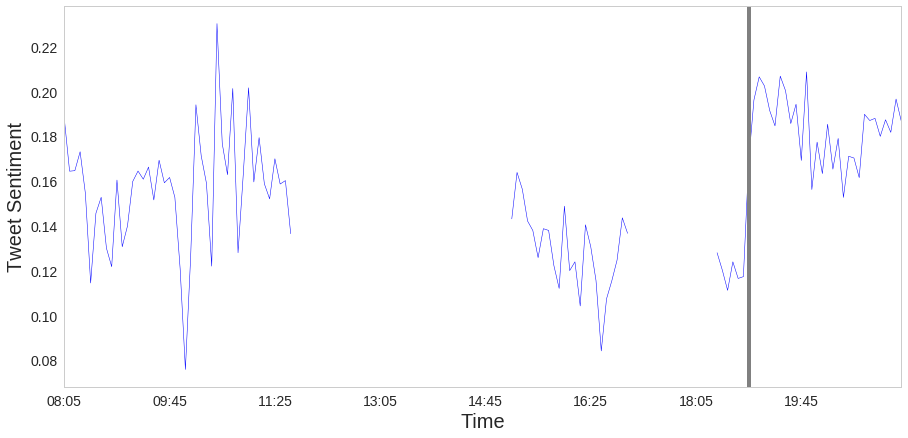

In [20]:
fig, ax = plt.subplots()
#sentiment1m.plot(legend=False,figsize=(15,7), color = 'red', linewidth = .5)
sentiment5m.plot(legend=False,figsize=(15,7), color = 'blue', linewidth = .5)
#sentiment20m.plot(legend=False,figsize=(15,10), color = 'green')
plt.setp(ax.get_xticklabels(),fontsize=14,family='sans-serif')
plt.setp(ax.get_yticklabels(),fontsize=14,family='sans-serif')
plt.xlabel('Time',fontsize=20,family='sans-serif')
plt.ylabel('Tweet Sentiment',fontsize=20,family='sans-serif')

plt.axvline(x=130, linewidth=4, color='grey')
#this indicates the time-interval of most intense tweeting, as shown by the graph above

plt.grid(False)
plt.show()

In [21]:
sentiment5m.min()


0.075712074366214577

In [22]:
sentiment5m.max()  #a nice, mildly happy crowd :)

0.23024606824396587